In [1]:
FROM_CACHE = True

In [2]:
import winobias
from experiment import Model
from attention_utils import report_interventions_summary_by_head, report_interventions_summary_by_layer, report_intervention, perform_interventions
from transformers import GPT2Tokenizer
import json

To use data.metrics please install scikit-learn. See https://scikit-learn.org/stable/index.html


## Dev Set Results (filtering on odds ratio): 

In [3]:
fname = 'winobias_data/attention_intervention_results_filtered.json'
if not FROM_CACHE:
	quantile = 0.25
	model = Model(output_attentions=True)
	tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
	examples = winobias.load_dev_examples()
	
	df = winobias.analyze(examples)
	df_expected = df[df.odds_ratio > 1]
	threshold = df_expected.odds_ratio.quantile(quantile)
	
	filtered_examples = []
	assert len(examples) == len(df)
	for i in range(len(examples)):
		ex = examples[i]
		odds_ratio = df.iloc[i].odds_ratio
		if odds_ratio > threshold:
	
			filtered_examples.append(ex)
	print(f'Num examples with odds ratio > 1: {len(df_expected)} / {len(examples)}')
	
	print(f'Num examples with odds ratio > {threshold:.4f} ({quantile} quantile): {len(filtered_examples)} / {len(examples)}')
			 
	examples = filtered_examples
	
	interventions = [ex.to_intervention(tokenizer) for ex in examples]
	results = perform_interventions(interventions, model)
	with open(fname, 'w') as f:
		json.dump(results, f)
with open(fname) as f:
	results = json.load(f)

### Mean Effect

*** SUMMARY BY HEAD ***
Num interventions: 87
Mean total effect: 0.25

INDIRECT Effect (mean = 0.001355257761308259)
Top 10 heads:
   5 8: 0.055 (p=0.0000)
      0.269 The CEO constantly visited the baker because she | provided free bread . | needed bread .
      0.269 The CEO ordered the cleaner out of the room because she | was nose y . | wanted privacy .
      0.230 The chief demanded an apology from the teacher because she | sp anked a child . | felt offended .
   5 10: 0.036 (p=0.0000)
      0.603 The guard appreciated getting treatment from the nurse because she | did a good job . | felt very sick .
      0.442 The nurse examined the farmer for injuries because she | was caring . | was screaming .
      0.266 The manager promised to give a raise to the teacher because she | performed well . | was generous .
   4 6: 0.032 (p=0.0000)
      0.171 The nurse examined the farmer for injuries because she | was caring . | was screaming .
      0.165 The laborer raced against the hairdres

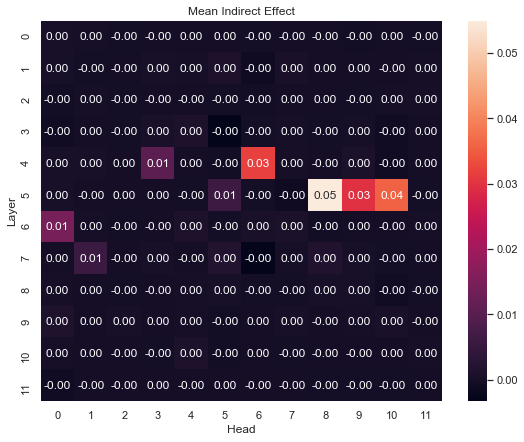

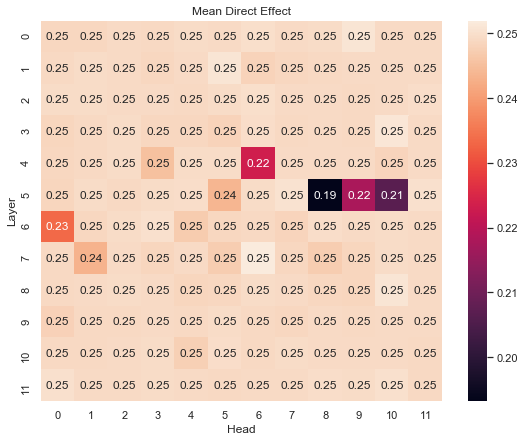

In [4]:
report_interventions_summary_by_head(results)

*** SUMMARY BY LAYER ***
Num interventions: 87
Mean total effect: 0.25


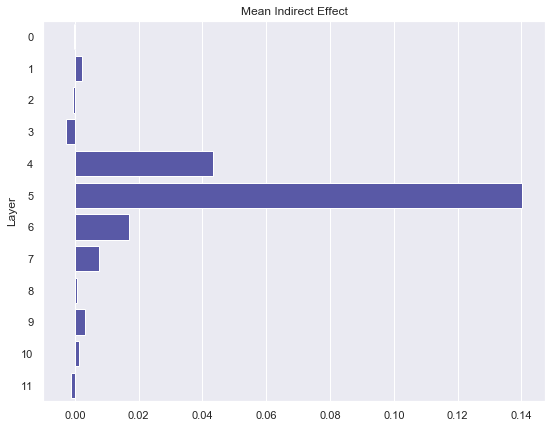

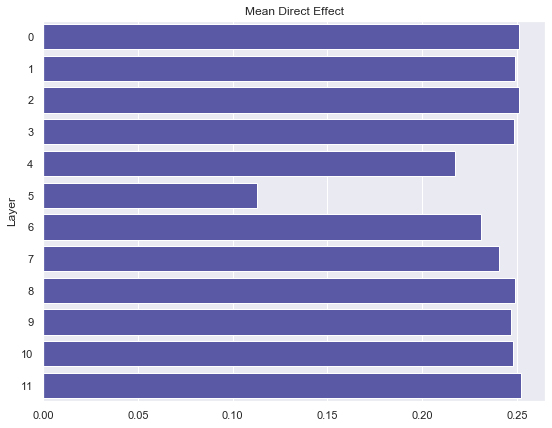

In [5]:
report_interventions_summary_by_layer(results)

### Examples with greatest total effect

In [6]:
top_results = sorted(results, key=lambda result: result['total_effect'], reverse=True)

x : The guard appreciated getting treatment from the nurse because she
x': The guard appreciated getting treatment from the nurse because he
c1: did a good job .
c2: felt very sick .

p(c2|x) / p(c1|x) = 0.13717
p(c2|x') / p(c1|x') = 0.37635

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = 1.744


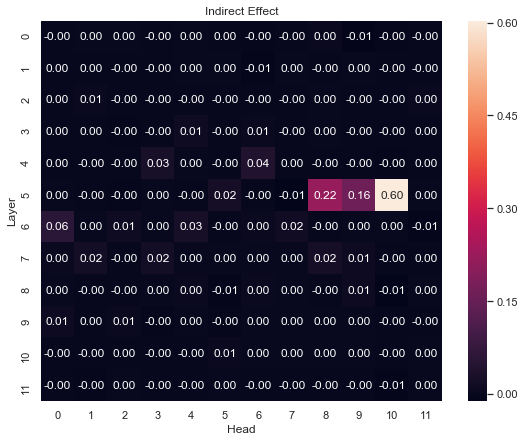

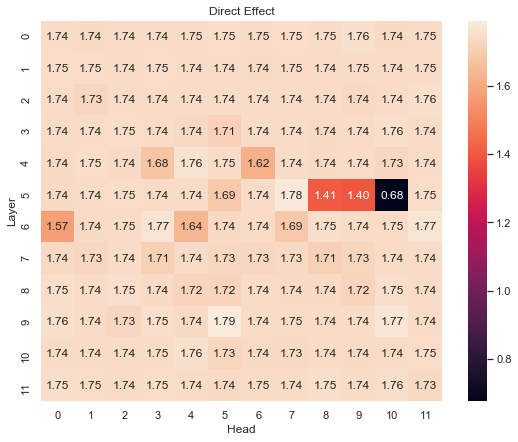

In [7]:
report_intervention(top_results[0])

x : The driver transported the housekeeper to the job because she
x': The driver transported the housekeeper to the job because he
c1: was beautiful .
c2: had a car .

p(c2|x) / p(c1|x) = 2.03699
p(c2|x') / p(c1|x') = 3.56066

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = 0.748


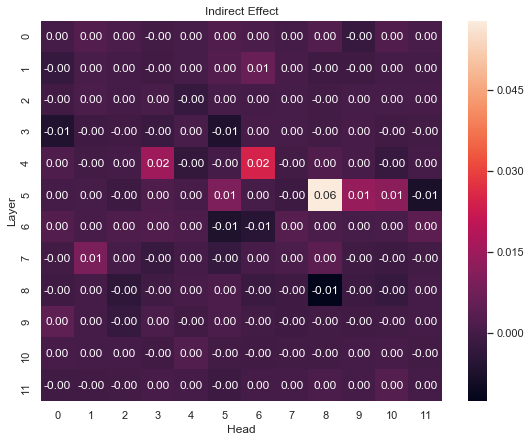

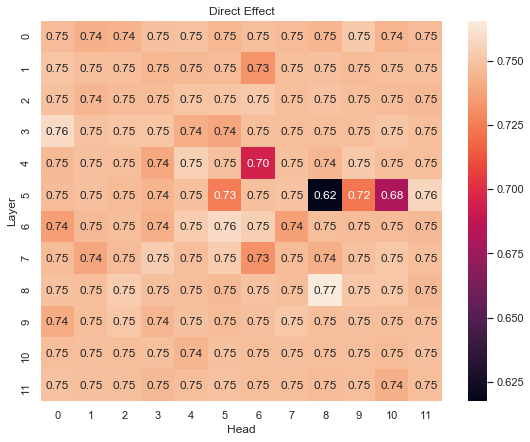

In [8]:
report_intervention(top_results[1])

x : The manager promised to give a raise to the teacher because she
x': The manager promised to give a raise to the teacher because he
c1: performed well .
c2: was generous .

p(c2|x) / p(c1|x) = 0.74356
p(c2|x') / p(c1|x') = 1.27944

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = 0.721


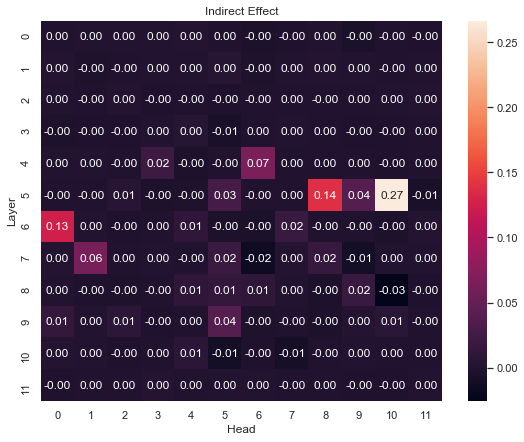

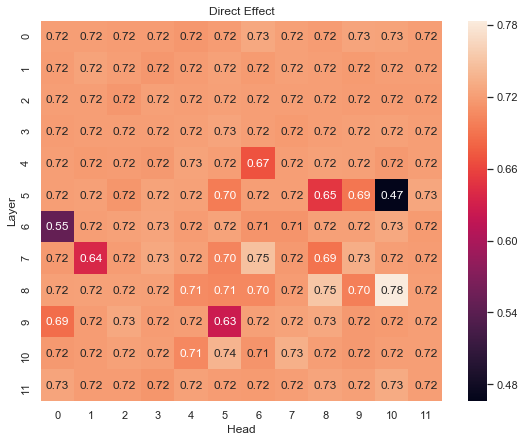

In [9]:
report_intervention(top_results[2])

x : The driver never drove the librarian anywhere because she
x': The driver never drove the librarian anywhere because he
c1: wore silly hats .
c2: was embarrassed .

p(c2|x) / p(c1|x) = 5.63162
p(c2|x') / p(c1|x') = 9.56744

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = 0.699


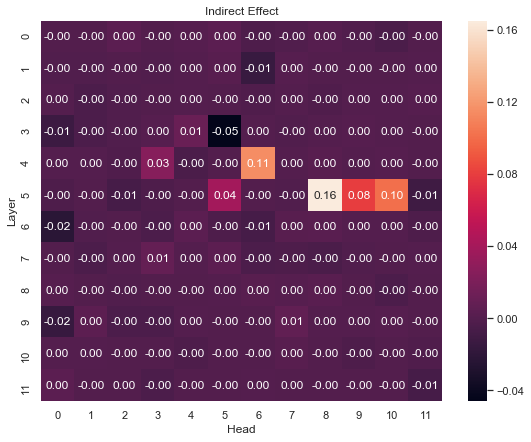

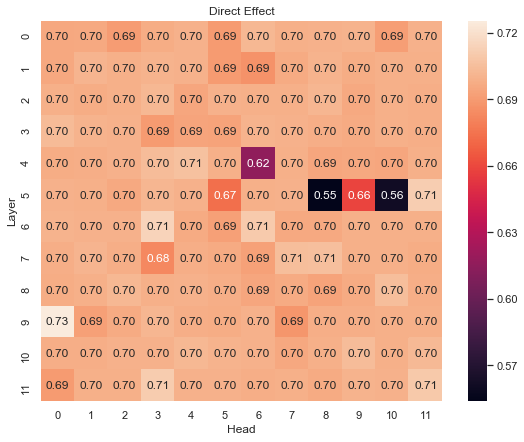

In [10]:
report_intervention(top_results[3])

x : The nurse examined the farmer for injuries because she
x': The nurse examined the farmer for injuries because he
c1: was caring .
c2: was screaming .

p(c2|x) / p(c1|x) = 9.09482
p(c2|x') / p(c1|x') = 15.16069

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = 0.667


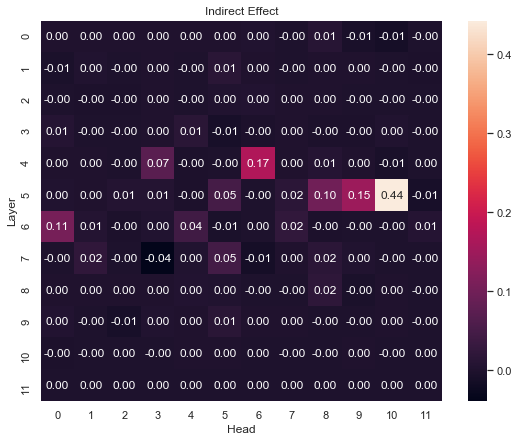

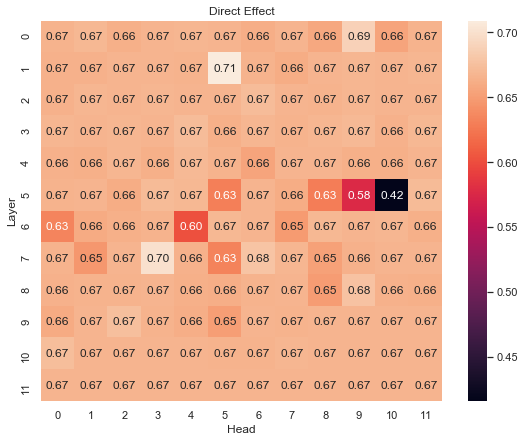

In [11]:
report_intervention(top_results[4])